In [1]:
smooth = (1,2)
x,y = smooth
import numpy as np
import scipy
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt

In [84]:
# index sorting

xx = np.array([[1,3,1],[2,5,4],[3,1,4]])
flat = xx.ravel() # make a list of values
sort = np.argsort(flat, axis=None)[::-1] # sort by max
#print(sort)
ind = np.unravel_index(sort,dims = xx.shape)
corner_loc = []
print(xx)
print(ind)

for i in range(len(ind[0])):
    
    corner_loc.append([ind[0][i],ind[1][i]])
    
corner_loc

[[1 3 1]
 [2 5 4]
 [3 1 4]]
(array([1, 2, 1, 2, 0, 1, 2, 0, 0], dtype=int64), array([1, 2, 2, 0, 1, 0, 1, 2, 0], dtype=int64))


[[1, 1], [2, 2], [1, 2], [2, 0], [0, 1], [1, 0], [2, 1], [0, 2], [0, 0]]

In [2]:
def convolve_row_wise(image,kernel): # function for row kernel
    output_im_shape = (image.shape[0],image.shape[1]-(kernel.shape[1]-1))
    output_im = np.zeros(output_im_shape)
    
    m = kernel.shape[1]
    #print(m)
    for j in range(image.shape[0]): # all rows
        for i in range(m//2,image.shape[1]-m//2): # losing some columns

            kernel_output = 0
        
            for k in range(m): 
                #print(k,i,j)
                kernel_output += image[j,i+(k-m//2)]*kernel[0,k]    
            
            output_im[j,i-m//2] = kernel_output
            
    return output_im   
    

    
    
def convolve_col_wise(image,kernel): # function for column kernel
    
    output_im_shape = (image.shape[0]-(kernel.shape[0]-1),image.shape[1])
    output_im = np.zeros(output_im_shape)

    m = kernel.shape[0]
    #print(m)
    for j in range(m//2,image.shape[0]-m//2): # all rows
        for i in range(image.shape[1]): # losing some columns

            kernel_output = 0

            for k in range(m): 
                #print(k,i,j)
                kernel_output += image[j+(k-m//2),i]*kernel[k,0]    

            output_im[j-m//2,i] = kernel_output

    return output_im  

In [51]:
def new_nms(image,windowSize):
    
    nms_im = image.copy()
    for j in range(windowSize//2,nms_im.shape[0]-windowSize//2):
        for i in range(windowSize//2,nms_im.shape[1]-windowSize//2):
            
            
            window = nms_im[j-windowSize//2:j+windowSize//2+1\
                          ,i-windowSize//2:i+windowSize//2+1]
            
            window_zeros  = np.zeros(window.shape) # lower all non-max values to zeros
            window_max    = np.amax(window)        # 
            max_loc       = np.where(window == window_max)
            k,l           = max_loc[0][0],max_loc[1][0] # take the first index of x and y as the max
            
            window_zeros[k,l] = window_max
            
            nms_im[j-windowSize//2:j+windowSize//2+1\
                  ,i-windowSize//2:i+windowSize//2+1] = window_zeros
            
    return nms_im
                
    
        
    

(array([0, 0, 0, 1, 1, 1, 2, 2, 2], dtype=int64),
 array([0, 1, 2, 0, 1, 2, 0, 1, 2], dtype=int64))

(0, 0)

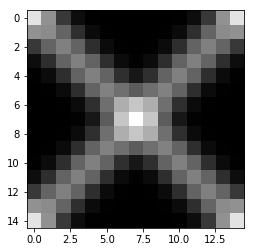

In [49]:
plt.imshow(y,cmap = 'gray')
window = y[0:3,0:3]
center = window[1,1]
np.where(window>center)[0][0],np.where(window>center)[1][0]


0.0


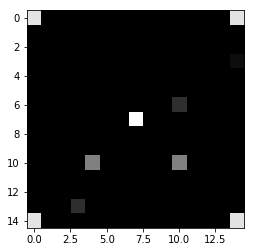

In [52]:
nms_im = new_nms(y,3)
print(np.min(nms_im))
plt.imshow(nms_im,cmap = 'gray')

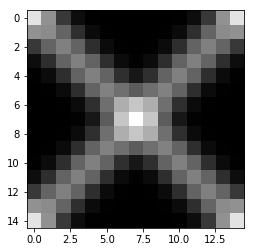

In [3]:
x = np.eye(15) + np.fliplr(np.eye(15))

y = gaussian_filter(x,1,truncate = 2)

plt.imshow(y,cmap = 'gray')
plt.show()

0.0

In [12]:
d_x = np.array([[-.5,0,.5]])
d_y = np.array([[-.5,0,.5]]).T


dx_im = convolve_row_wise(y,d_x) # we lose 2 columns
dy_im = convolve_col_wise(y,d_y) # we lose 2 rows

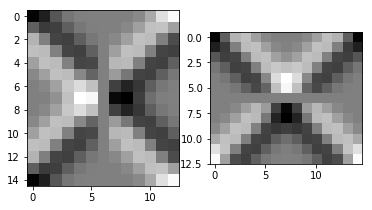

In [14]:
plt.subplot(1,2,1)
plt.imshow(dx_im,cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(dy_im,cmap = 'gray')
plt.show()

In [16]:
dx_im.shape,smooth_x

((15L, 13L), 15L)

In [18]:
smooth_y,smooth_x = x.shape
windowSize = 3
dx_im = np.hstack((np.zeros((smooth_y,windowSize//2)),dx_im,np.zeros((smooth_y,windowSize//2))))
dy_im = np.vstack((np.zeros((windowSize//2,smooth_x)),dy_im,np.zeros((windowSize//2,smooth_x))))

In [19]:
Ixy = dx_im*dy_im
I_th = dy_im/dx_im
I_th[np.where(np.isnan(I_th))] = 0
pinf = float('+inf')
ninf = float('-inf')
I_th[np.where(I_th == pinf)] = 3.14/2
I_th[np.where(I_th == ninf)] = -3.14/2


C:\Users\Steve\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  
C:\Users\Steve\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


In [21]:
I_th

array([[ 0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-1.57      ,  1.        , -0.74704358, -0.97025178, -1.        ,
        -1.        , -1.        ,  0.        ,  1.        ,  1.        ,
         1.        ,  0.97025178,  0.74704358, -1.        , -1.57      ],
       [-1.57      , -1.33860998,  1.        , -1.        , -1.        ,
        -1.        , -1.        ,  1.57      ,  1.        ,  1.        ,
         1.        ,  1.        , -1.        ,  1.33860998, -1.57      ],
       [-1.57      , -1.03066031, -1.        ,  0.        , -1.        ,
        -1.        , -1.06085751,  1.57      ,  1.06085751,  1.        ,
         1.        ,  0.        ,  1.        ,  1.03066031, -1.57      ],
       [-1.57      , -1.        , -1.        , -1.        ,  0.        ,
        -1.03283772, -1.31303529,  1.57      , 

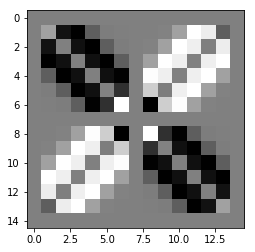

In [22]:
plt.imshow(Ixy,cmap = 'gray')
plt.show()

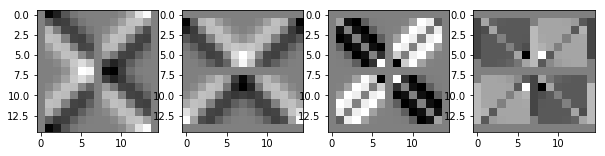

In [28]:
plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.imshow((dx_im),cmap = 'gray')
plt.subplot(1,4,2)
plt.imshow(dy_im,cmap = 'gray')
plt.subplot(1,4,3)
plt.imshow(Ixy,cmap = 'gray')
plt.subplot(1,4,4)
plt.imshow(I_th,cmap = 'gray')
plt.show()

In [17]:
# new version of the old code


def nms(C_image,Ixx,Iyy,windowSize):


    # need to remove some data from the edges of the gradient matrices
    # the corner detector removed some data
    print(Ixx.shape,Iyy.shape)
    Ixx = Ixx[windowSize//2:-windowSize//2,windowSize//2:-windowSize//2]
    Iyy = Iyy[windowSize//2:-windowSize//2,windowSize//2:-windowSize//2]


    g_mag = Ixx*Iyy
    g_theta = np.zeros((g_mag.shape))
    
    
    Ixy = dx_im*dy_im
    I_th = dy_im/dx_im
    I_th[np.where(np.isnan(I_th))] = 0
    pinf = float('+inf')
    ninf = float('-inf')
    I_th[np.where(I_th == pinf)] = 3.14/2
    I_th[np.where(I_th == ninf)] = -3.14/2
    

    #image = g_mag.copy()
    image = C_image.copy()
    print(image.shape)
    window_size = windowSize
    m = 0

    # -------------- window iteration sliding ------------------------#
    for i in range(window_size//2,g_mag.shape[1]-window_size//2):
        for j in range(window_size//2,g_mag.shape[0]-window_size//2):

            window = image[j-window_size//2:j+window_size//2+1\
                           ,i-window_size//2:i+window_size//2+1]

            if i == window_size//2: # sanity check ourselves
                try:
                    assert window.shape == (window_size,window_size) 
                except:
                    print(window.shape,i,j)
                    return


            # ------------- find points in line with the gradient -------# 

            '''
            # going to derive an equation for the line created 
            by the gradient and see which pixels intersect that line

             grad.dir     ^ y
                     \    |
                      \   |
                       \  |
                        \ |
                         \|
               x<- - - - - 


            '''

            intensity = image[j,i]
            theta     = g_theta[j,i]
            candidates = np.zeros(window.shape)

#             # check for horizontal lines:
#             if abs(math.tan(theta))*window_size//2 <= 1:
#                 candidates[window_size//2,:] = 1

#     #         # check for vertical lines
#     #         elif abs(math.tan(theta)) > window_size//2: 

#     #             candidates[:,window_size//2] = 1

#             else:

#                 # derive equation for the line
#                 y_coord = window_size//2 # this is the center of our nms window
#                 x_coord = window_size//2 #
#                 b = y_coord - math.tan(theta)*x_coord # line eq


#                 # new we find what values the line intersects
#                 for k in range(window_size): # x values
#                     for l in range(window_size): # y values

#                         if k == window_size//2 & l == window_size//2: # skip the center point
#                             candidates[l,k]=1
#                             continue
                            

#                         y_value = math.tan(theta)*k+b 
#                         y_pix = np.round(y_value,0).astype(int)# the pixel that the line itersects is the floor value of y

#                         if y_pix == l:
#                             candidates[l,k]=1
                
            y_coord = window_size//2 # this is the center of our nms window
            x_coord = window_size//2 #
            b = y_coord - math.tan(theta)*x_coord # line eq            


            for k in range(window_size): # x values

                        y_value = math.tan(theta)*k+b 
                        y_pix = np.round(y_value,0).astype(int)# the pixel that the line itersects is the floor value of y

                        if k == window_size//2 & l == window_size//2: # skip the center point
                            candidates[l,k]=1 
                            continue

                        if y_pix <= window_size:
                            candidates[y_pix,k]=1         
                            
                            
                            
                            ### TRY REARRANGING THIS SO WE TURN ON EVERYTHING ON THE LINE


    #         if i/50 in [1,2,3,4,5,6]:
    #             print(abs(math.tan(theta)))
    #             print(candidates)

            # --------- compare candidates to the center value -------------# 

            updated_window = window.copy()
            max_val_loc = ()
            max_val = intensity

            for k in range(window_size):
                for l in range(window_size):

                    if candidates[l,k]==1: # make sure its along the gradient
                        candidate_value = window[l,k]

                        if candidate_value > max_val: 
                            # find our maximum value along the line
                            max_val == candidate_value
                            max_val_loc = (l,k)


            # zero out non-max values

            if len(max_val_loc) == 0: 
                # our center point had the highest value, 
                # set the rest of the candidates == 0
                updated_window[np.where(candidates==1)]=0
            else:
                updated_window[np.where(candidates==1)]=0
                updated_window[max_val_loc[0],max_val_loc[1]]=max_val

#         if max_val > 0:
#             print(max_val)
#             print(candidates)



            #update the image
            image[j-window_size//2:j+window_size//2+1\
                  ,i-window_size//2:i+window_size//2+1] = updated_window

    return image


0.0

In [ ]:
  # address any padding issues
    smooth_y,smooth_x = smooth_im.shape
    
    dx_im = np.hstack((np.zeros((smooth_y,windowSize//2)),dx_im,np.zeros((smooth_y,window_size//2))))
    dy_im = np.vstack((np.zeros((windowSize//2,smooth_x)),dy_im,np.zeros((windowSize//2,smooth_x))))
    
    
    # building moment matrices:
    
    Ixx = np.multiply(dx_im,dx_im)
    Iyy = np.multiply(dy_im,dy_im)
    Ixy = np.multiply(dx_im,dy_im)
    
    # building corner function
    
    
    # shape of new image after kernel op with the window
    corner_shape = (image.shape[0]-(windowSize-1),image.shape[1]-(windowSize-1))
    corner_im    = np.zeros(corner_shape)
    
    for j in range(windowSize//2,image.shape[0]-windowSize//2):
        
        for i in range(windowSize//2,image.shape[1]-windowSize//2):  


            window_coordsj = range(j-windowSize//2,j+windowSize//2+1)
            window_coordsi = range(i-windowSize//2,i+windowSize//2+1)
            C = np.array([[0,0],[0,0]])
            
            for jj in range(len(window_coordsj)):
                for ii in range(len(window_coordsi)):
                    
                    # setting window function to 1's
                    C[0,0] += Ixx[window_coordsj[jj],window_coordsi[ii]]
                    C[0,1] += Ixy[window_coordsj[jj],window_coordsi[ii]]
                    C[1,0] += Ixy[window_coordsj[jj],window_coordsi[ii]] 
                    C[1,1] += Iyy[window_coordsj[jj],window_coordsi[ii]]
                    
                    
            # find the min eigenvalue:
            small_eig = np.min(np.linalg.eigvals(C))

            threshold = .04 # .04-.14

            if small_eig >= threshold:
                
                corner_im[j-windowSize//2,i-windowSize//2] = small_eig
                

In [ ]:
#### OLD NMS CODE ###
def nms(C_image,Ixx,Iyy,windowSize):


    # need to remove some data from the edges of the gradient matrices
    # the corner detector removed some data
    print(Ixx.shape,Iyy.shape)
    Ixx = Ixx[windowSize//2:-windowSize//2,windowSize//2:-windowSize//2]
    Iyy = Iyy[windowSize//2:-windowSize//2,windowSize//2:-windowSize//2]


    g_mag = Ixx*Iyy
    g_theta = np.zeros((g_mag.shape))
    print(g_mag.shape)

    for i in range(g_mag.shape[1]):
        for j in range(g_mag.shape[0]):


            try:

                if Iyy[j,i]==0 & Ixx[0,0] == 0:
                    continue

                else:
                    g_theta[j,i] = math.atan(Iyy[j,i]/Ixx[j,i])

            except:
                g_theta[j,i] = math.atan(Iyy[j,i]/.00001) 

    #image = g_mag.copy()
    image = C_image.copy()
    print(image.shape)
    window_size = windowSize
    m = 0

    # -------------- window iteration sliding ------------------------#
    for i in range(window_size//2,g_mag.shape[1]-window_size//2):
        for j in range(window_size//2,g_mag.shape[0]-window_size//2):

            window = image[j-window_size//2:j+window_size//2+1\
                           ,i-window_size//2:i+window_size//2+1]

            if i == window_size//2: # sanity check ourselves
                try:
                    assert window.shape == (window_size,window_size) 
                except:
                    print(window.shape,i,j)
                    return


            # ------------- find points in line with the gradient -------# 

            '''
            # going to derive an equation for the line created 
            by the gradient and see which pixels intersect that line

             grad.dir     ^ y
                     \    |
                      \   |
                       \  |
                        \ |
                         \|
               x<- - - - - 


            '''

            intensity = image[j,i]
            theta     = g_theta[j,i]
            candidates = np.zeros(window.shape)

#             # check for horizontal lines:
#             if abs(math.tan(theta))*window_size//2 <= 1:
#                 candidates[window_size//2,:] = 1

#     #         # check for vertical lines
#     #         elif abs(math.tan(theta)) > window_size//2: 

#     #             candidates[:,window_size//2] = 1

#             else:

#                 # derive equation for the line
#                 y_coord = window_size//2 # this is the center of our nms window
#                 x_coord = window_size//2 #
#                 b = y_coord - math.tan(theta)*x_coord # line eq


#                 # new we find what values the line intersects
#                 for k in range(window_size): # x values
#                     for l in range(window_size): # y values

#                         if k == window_size//2 & l == window_size//2: # skip the center point
#                             candidates[l,k]=1
#                             continue
                            

#                         y_value = math.tan(theta)*k+b 
#                         y_pix = np.round(y_value,0).astype(int)# the pixel that the line itersects is the floor value of y

#                         if y_pix == l:
#                             candidates[l,k]=1
                
            y_coord = window_size//2 # this is the center of our nms window
            x_coord = window_size//2 #
            b = y_coord - math.tan(theta)*x_coord # line eq            


            for k in range(window_size): # x values

                        y_value = math.tan(theta)*k+b 
                        y_pix = np.round(y_value,0).astype(int)# the pixel that the line itersects is the floor value of y

                        if k == window_size//2 & l == window_size//2: # skip the center point
                            candidates[l,k]=1 
                            continue

                        if y_pix <= window_size:
                            candidates[y_pix,k]=1         
                            
                            
                            
                            ### TRY REARRANGING THIS SO WE TURN ON EVERYTHING ON THE LINE


    #         if i/50 in [1,2,3,4,5,6]:
    #             print(abs(math.tan(theta)))
    #             print(candidates)

            # --------- compare candidates to the center value -------------# 

            updated_window = window.copy()
            max_val_loc = ()
            max_val = intensity

            for k in range(window_size):
                for l in range(window_size):

                    if candidates[l,k]==1: # make sure its along the gradient
                        candidate_value = window[l,k]

                        if candidate_value > max_val: 
                            # find our maximum value along the line
                            max_val == candidate_value
                            max_val_loc = (l,k)


            # zero out non-max values

            if len(max_val_loc) == 0: 
                # our center point had the highest value, 
                # set the rest of the candidates == 0
                updated_window[np.where(candidates==1)]=0
            else:
                updated_window[np.where(candidates==1)]=0
                updated_window[max_val_loc[0],max_val_loc[1]]=max_val

#         if max_val > 0:
#             print(max_val)
#             print(candidates)



            #update the image
            image[j-window_size//2:j+window_size//2+1\
                  ,i-window_size//2:i+window_size//2+1] = updated_window

    return image